In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint
from sklearn import model_selection, linear_model, metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
df=pd.read_csv("F:\RUSHIKESH\Projects\Credit-Risk-Prediction\data\credit_risk_dataset.csv")

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Extract numerical data

In [4]:
num_cols = pd.DataFrame(df[df.select_dtypes(include=['float', 'int']).columns])

In [5]:
num_cols

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [6]:
# get the total null values of each columns
num_cols.isnull().sum()

person_age                       0
person_income                    0
person_emp_length              895
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
# calculating null value percentage for each column
nan_val=num_cols.isnull().sum()/df.shape[0]*100
nan_val.round(2)

person_age                    0.00
person_income                 0.00
person_emp_length             2.75
loan_amnt                     0.00
loan_int_rate                 9.56
loan_status                   0.00
loan_percent_income           0.00
cb_person_cred_hist_length    0.00
dtype: float64

In [8]:
nan_plot=num_cols[['person_emp_length', 'loan_int_rate']].copy()

<AxesSubplot: >

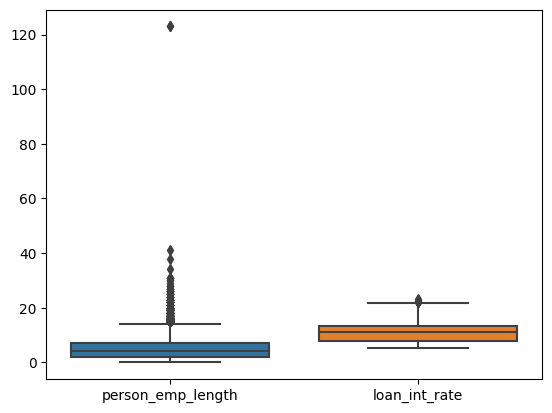

In [9]:
sns.boxplot(data=nan_plot)

In [10]:
# the person_emp_length feature contains a large amount of outliers, hence replacing the NaN values of the same by the median 
# value of the feature would be a good choice as the mean value would be off due to the outliers

In [11]:
print('person_emp_length mode {}'.format(df['person_emp_length'].mode()[0]))
print('person_emp_length median {}'.format(df['person_emp_length'].median()))
print('person_emp_length mean {}'.format(df['person_emp_length'].mean()))

print('loan_int_rate mode {}'.format(df['loan_int_rate'].mode()[0]))
print('loan_int_rate median {}'.format(df['loan_int_rate'].median()))
print('loan_int_rate mean {}'.format(df['loan_int_rate'].median()))

person_emp_length mode 0.0
person_emp_length median 4.0
person_emp_length mean 4.789686296787225
loan_int_rate mode 7.51
loan_int_rate median 10.99
loan_int_rate mean 10.99


In [12]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [14]:
numerical_cols=pd.DataFrame(df[df.select_dtypes(include=['float', 'int']).columns])

In [15]:
numerical_cols.drop(['loan_status'], axis=1)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,0.59,3
1,21,9600,5.0,1000,11.14,0.10,2
2,25,9600,1.0,5500,12.87,0.57,3
3,23,65500,4.0,35000,15.23,0.53,2
4,24,54400,8.0,35000,14.27,0.55,4
...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30
32577,54,120000,4.0,17625,7.49,0.15,19
32578,65,76000,3.0,35000,10.99,0.46,28
32579,56,150000,5.0,15000,11.48,0.10,26


C:\Users\skmal\AppData\Local\Temp\ipykernel_17972\1315565915.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_cols[col], color='forestgreen',
C:\Users\skmal\AppData\Local\Temp\ipykernel_17972\1315565915.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_cols[col], color='

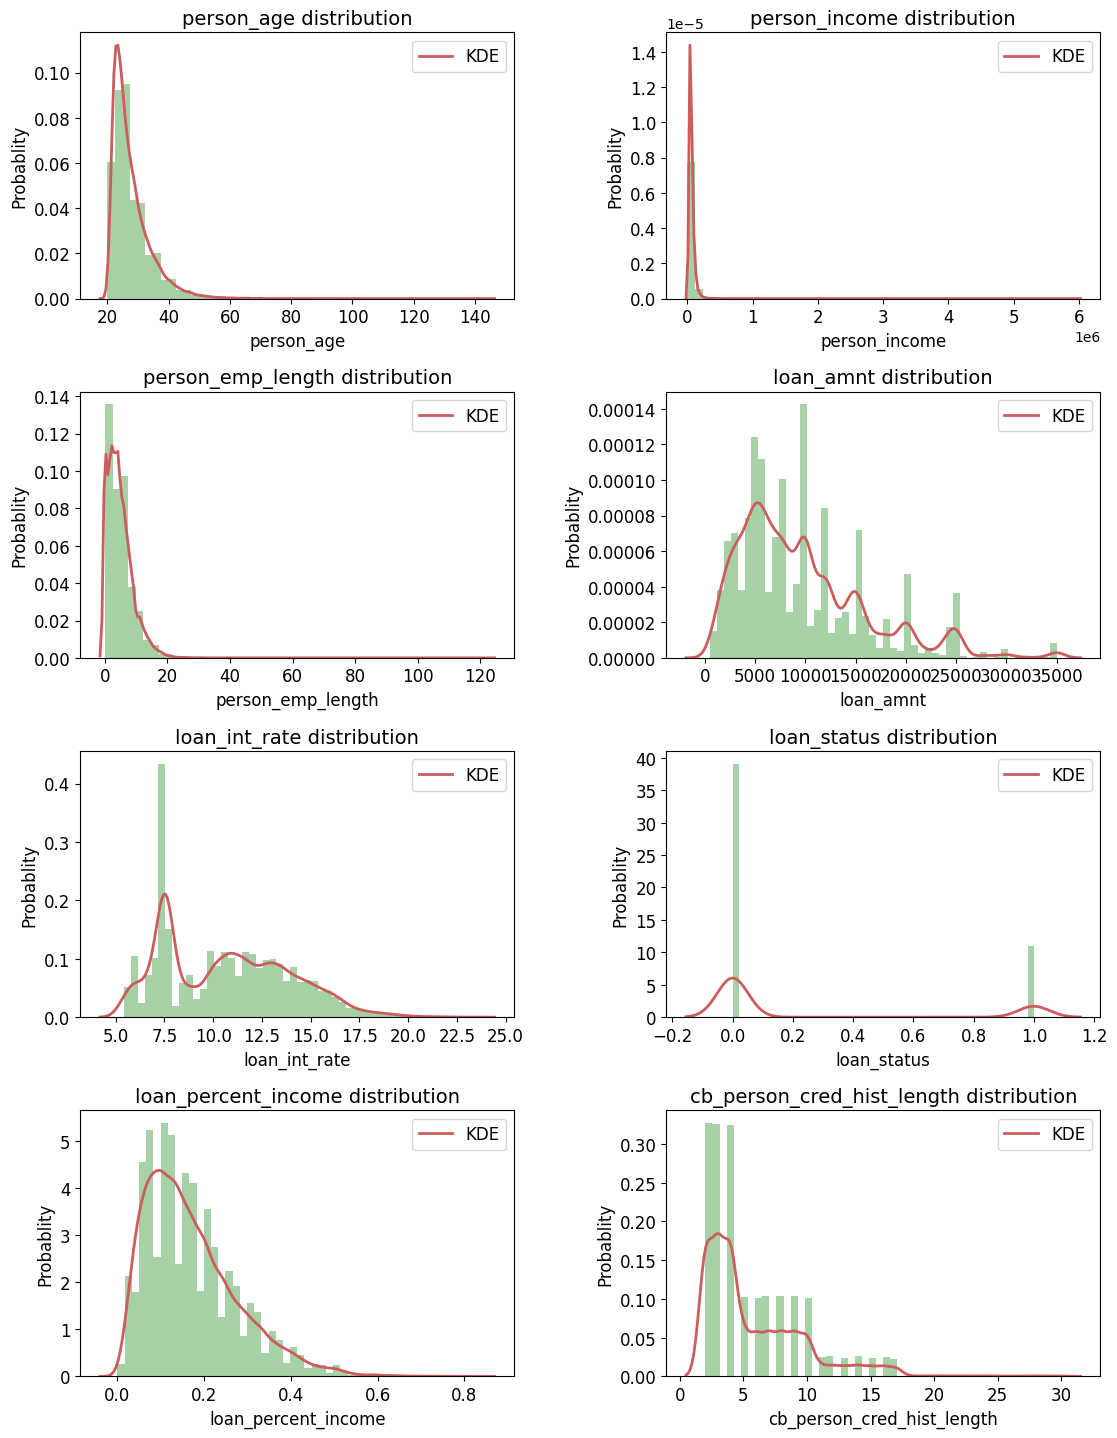

In [16]:
plt.figure(figsize=(12,16))

for i, col in enumerate(numerical_cols.columns):
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.distplot(numerical_cols[col], color='forestgreen', 
                 kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12})

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)
plt.show()

In [17]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [18]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,10.676798,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.249134,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.510000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [19]:
# person_age, person_emp_length, person_income unlike other features are not uniformly distributed.
# therefore dropping of outliers for the 3 feartures is carried out.

In [20]:
clean_df=df[df['person_age']<=100]
clean_df=clean_df[clean_df['person_emp_length']<=60]
clean_df=clean_df[clean_df['person_income']<=4e6]

In [21]:
clean_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [22]:
clean_numerical_cols=pd.DataFrame(clean_df[clean_df.select_dtypes(include=['int', 'float']).columns])

In [23]:
clean_numerical_cols

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
5,21,9900,2.0,2500,7.14,1,0.25,2
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


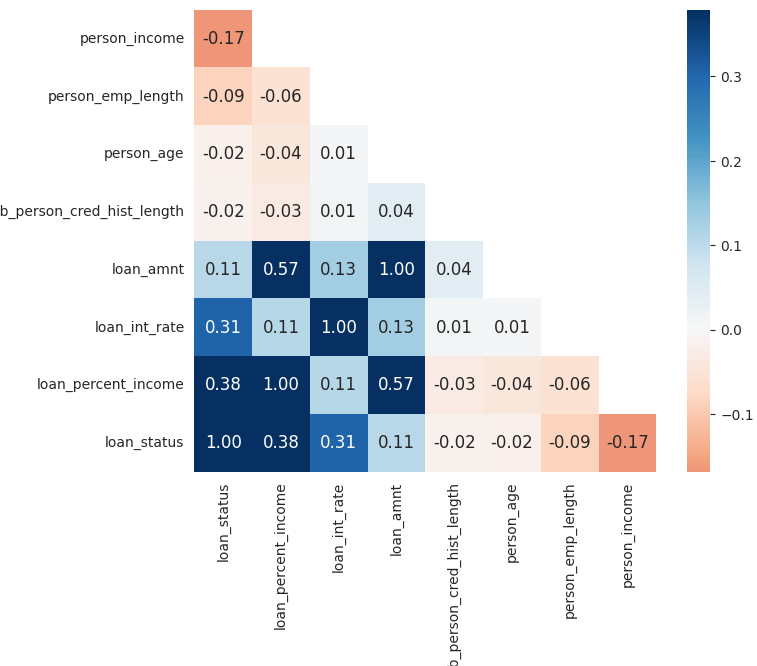

In [24]:
corr = clean_numerical_cols.corr().sort_values('loan_status', axis=1, ascending=False)
corr = corr.sort_values('loan_status', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.loan_status.min(), 
                     vmax=corr.drop(['loan_status'], axis=0).loan_status.max(),
                     square=True, annot=True, fmt='.2f',
                     center=0, cmap='RdBu',annot_kws={"size": 12})

In [25]:
categorical_cols=pd.DataFrame(clean_df[clean_df.select_dtypes(include=['object']).columns])
categorical_cols

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
5,OWN,VENTURE,A,N
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


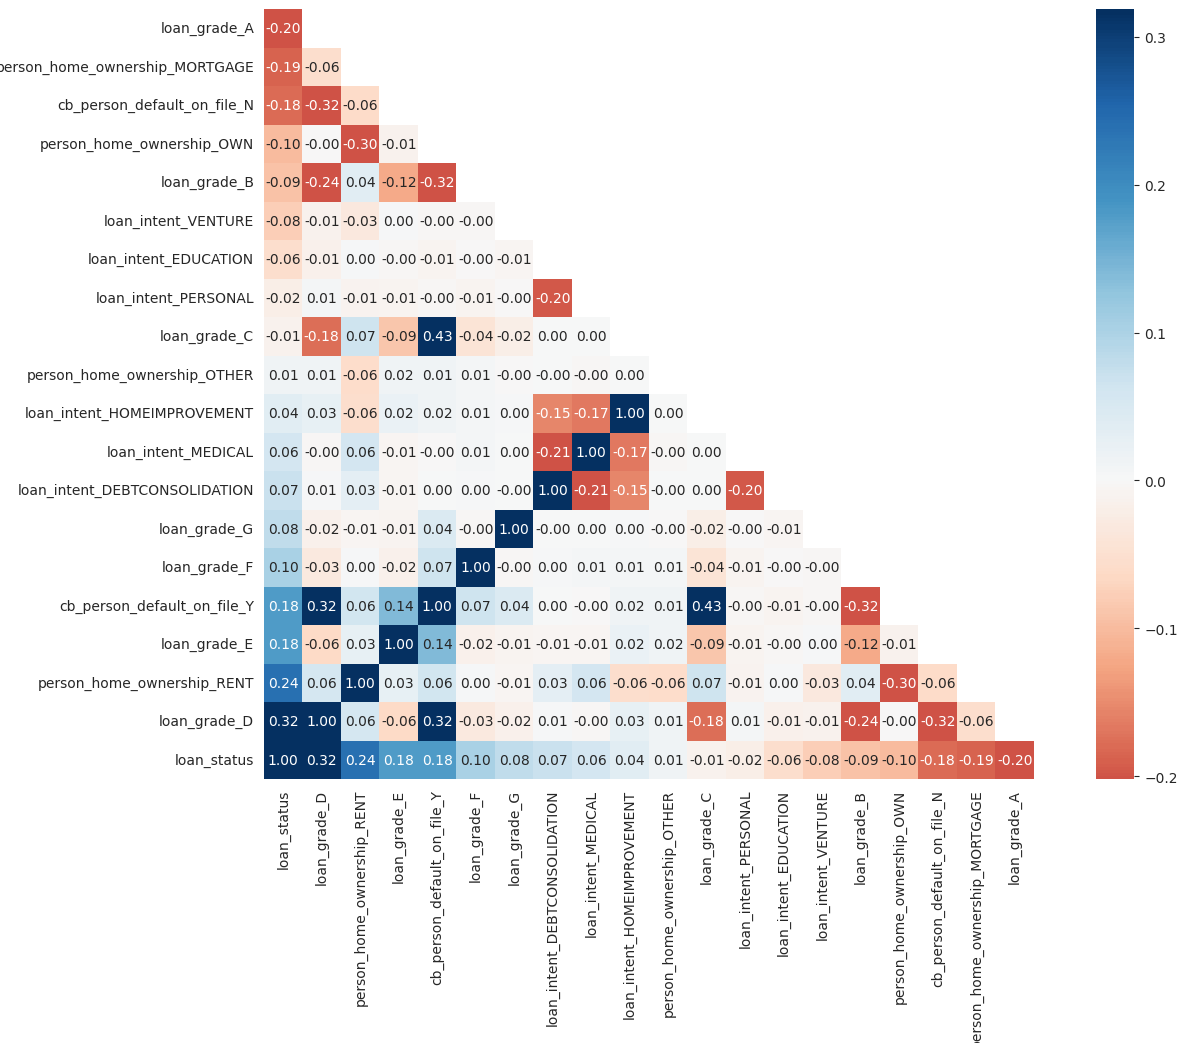

In [26]:
# one-hot encode the catogorical variebles
encoded_categorical_cols = pd.get_dummies(categorical_cols)
categorical_cols_corr = pd.concat([encoded_categorical_cols, clean_df['loan_status']], axis=1)
corr = categorical_cols_corr.corr().sort_values('loan_status', axis=1, ascending=False)
corr = corr.sort_values('loan_status', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.loan_status.min(), 
                     vmax=corr.drop(['loan_status'], axis=0).loan_status.max(), 
                     square=True, annot=True, fmt='.2f',
                     center=0, cmap='RdBu',annot_kws={"size": 10})

In [27]:
clean_df = pd.concat([clean_numerical_cols, encoded_categorical_cols], axis=1)
clean_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


In [28]:
clean_df.shape

(32574, 27)

In [29]:
label=clean_df['loan_status']
features=clean_df.drop(['loan_status'], axis=1)

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, random_state=42, test_size=0.3)

In [30]:
def model(model, name='Default'):
    model.fit(X_train, y_train)
    prediction=model.predict(X_test)
#     prediction_probability=model.predict.proba(X_test)
    print(name, '\n', classification_report(y_test, model.predict(X_test)))

In [31]:
knn = KNeighborsClassifier(n_neighbors=150)
model(knn, name='KNN')

KNN 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      7631
           1       0.74      0.39      0.51      2142

    accuracy                           0.84      9773
   macro avg       0.79      0.67      0.70      9773
weighted avg       0.82      0.84      0.81      9773



In [32]:
lg = LogisticRegression(random_state=42)
model(lg, 'Logistic Regression')

Logistic Regression 
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      7631
           1       0.74      0.15      0.25      2142

    accuracy                           0.80      9773
   macro avg       0.77      0.57      0.57      9773
weighted avg       0.79      0.80      0.75      9773



In [33]:
D_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
model(D_tree, 'DecisionTree Classifier')

DecisionTree Classifier 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      7631
           1       0.95      0.72      0.82      2142

    accuracy                           0.93      9773
   macro avg       0.94      0.86      0.89      9773
weighted avg       0.93      0.93      0.93      9773



In [34]:
import xgboost as xgb


In [35]:
xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42) 
model(xgb, 'XGBoost')

XGBoost 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      7631
           1       0.95      0.76      0.84      2142

    accuracy                           0.94      9773
   macro avg       0.94      0.87      0.90      9773
weighted avg       0.94      0.94      0.94      9773



In [36]:
knn.predict_proba(X_test)

array([[0.89333333, 0.10666667],
       [0.88666667, 0.11333333],
       [0.88      , 0.12      ],
       ...,
       [0.80666667, 0.19333333],
       [0.84666667, 0.15333333],
       [0.82666667, 0.17333333]])

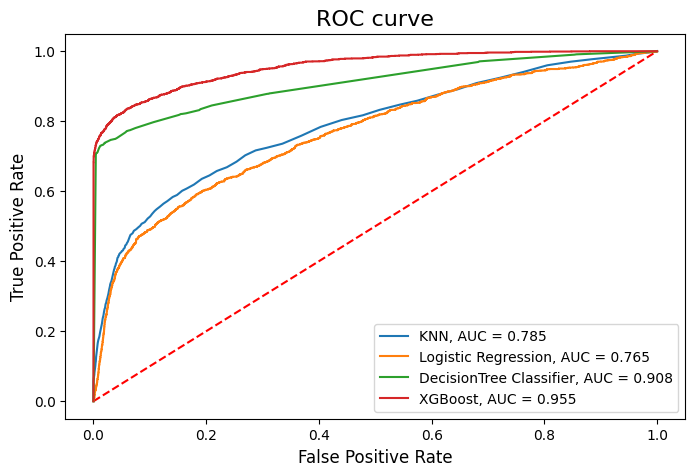

In [86]:
fig = plt.figure(figsize=(8,5))
plt.plot([0, 1], [0, 1],'r--')

#KNN
preds_proba_knn = knn.predict_proba(X_test)
probsknn = preds_proba_knn[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsknn)
aucknn = roc_auc_score(y_test, probsknn)
plt.plot(fpr, tpr, label=f'KNN, AUC = {str(round(aucknn,3))}')

#Logistic Regression
preds_proba_lg = lg.predict_proba(X_test)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')

#Decision Tree 
preds_proba_D_tree = D_tree.predict_proba(X_test)
probsD_tree = preds_proba_D_tree[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsD_tree)
aucdt = roc_auc_score(y_test, probsD_tree)
plt.plot(fpr, tpr, label=f'DecisionTree Classifier, AUC = {str(round(aucdt,3))}')

#XGBoost
preds_proba_xgb = xgb.predict_proba(X_test)
probsxgb = preds_proba_xgb[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsxgb)
aucxgb = roc_auc_score(y_test, probsxgb)
plt.plot(fpr, tpr, label=f'XGBoost, AUC = {str(round(aucxgb,3))}')
plt.ylabel("True Positive Rate", fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 16
plt.legend()
plt.show()

In [87]:
print('AUROC score for KNN is {}'.format(aucknn))
print('AUROC score for Logistic Regression is {}'.format(auclg))
print('AUROC score for Decision Tree is {}'.format(aucdt))
print('AUROC score for XgBoost is {}'.format(aucxgb))

AUROC score for KNN is 0.7850824643839976
AUROC score for Logistic Regression is 0.7647997914056639
AUROC score for Decision Tree is 0.9083751090966243
AUROC score for XgBoost is 0.9553073970600777
